# Data Preprocessing Tools

## Importing the libraries

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.optimizers import Adam
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

## Importing the dataset

In [2]:
label = 'Student_performance_data.csv'
dataset = pd.read_csv('datasets/'+label)

## Printing the dataset

In [3]:
print(dataset)

      StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0          1001   17       1          0                  2        19.833723   
1          1002   18       0          0                  1        15.408756   
2          1003   15       0          2                  3         4.210570   
3          1004   17       1          0                  3        10.028829   
4          1005   17       1          0                  2         4.672495   
...         ...  ...     ...        ...                ...              ...   
2387       3388   18       1          0                  3        10.680555   
2388       3389   17       0          0                  1         7.583217   
2389       3390   16       1          0                  2         6.805500   
2390       3391   16       1          1                  0        12.416653   
2391       3392   16       1          0                  2        17.819907   

      Absences  Tutoring  ParentalSupport  Extracur

## Taking care of missing data

In [4]:
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# imputer.fit(X[:, 1:3])
# X[:, 1:3] = imputer.transform(X[:, 1:3])

## Histogram and Boxplot

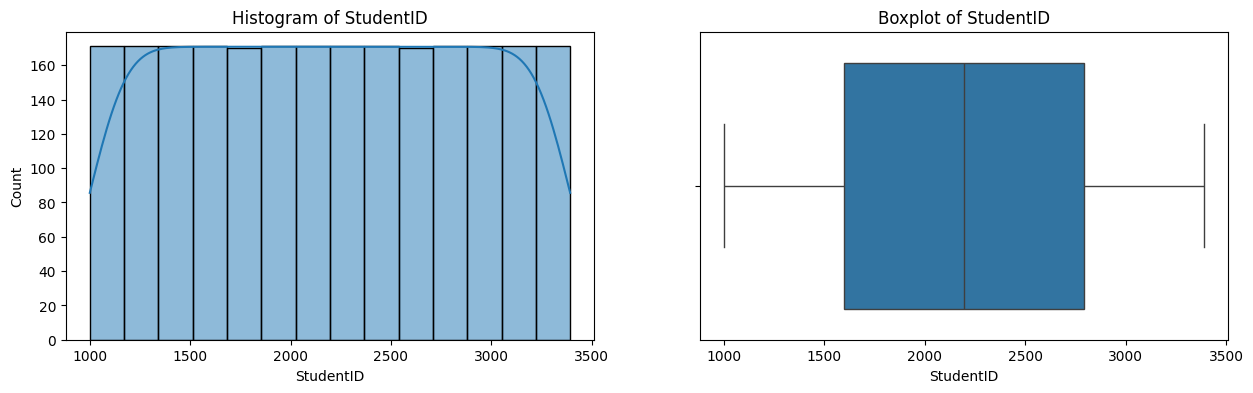

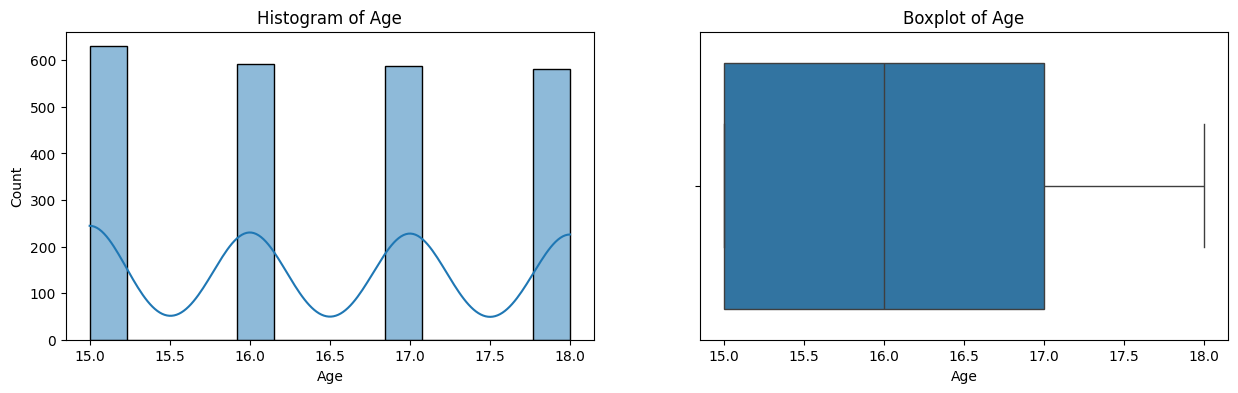

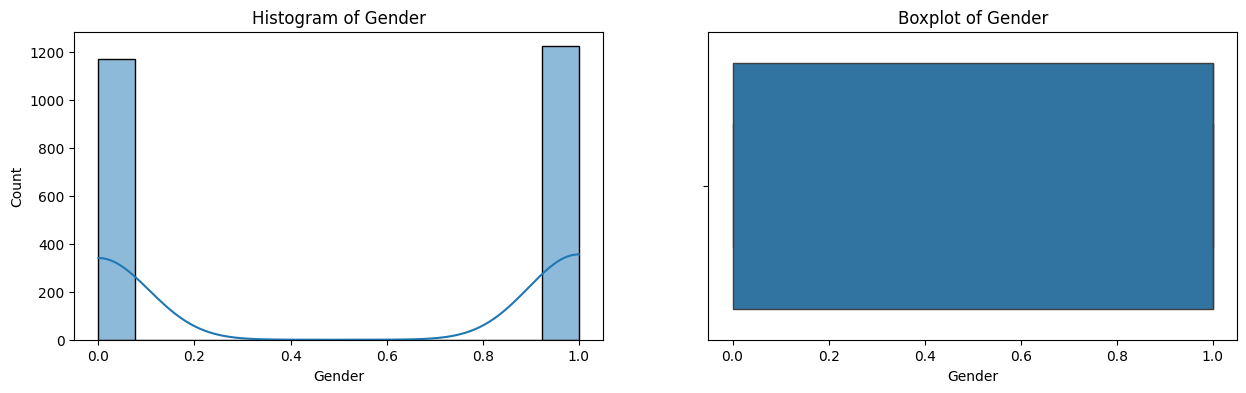

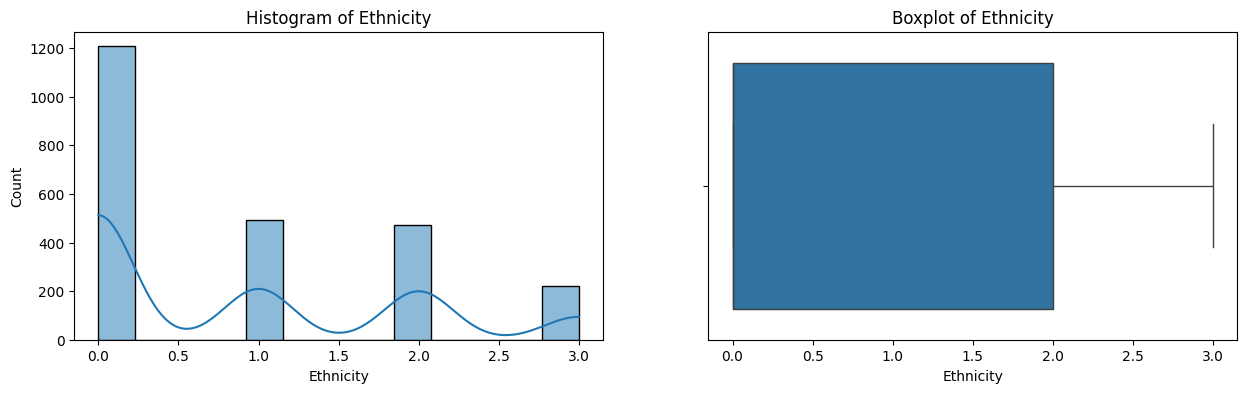

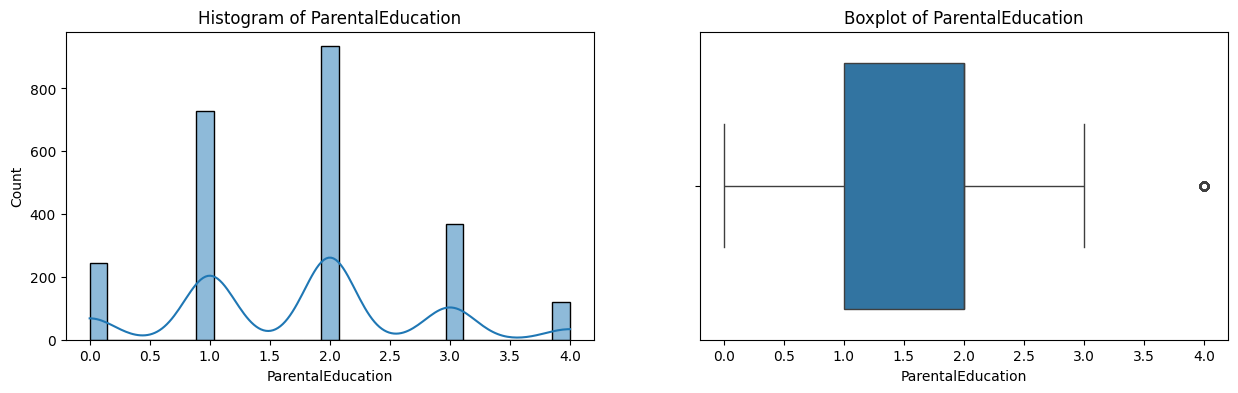

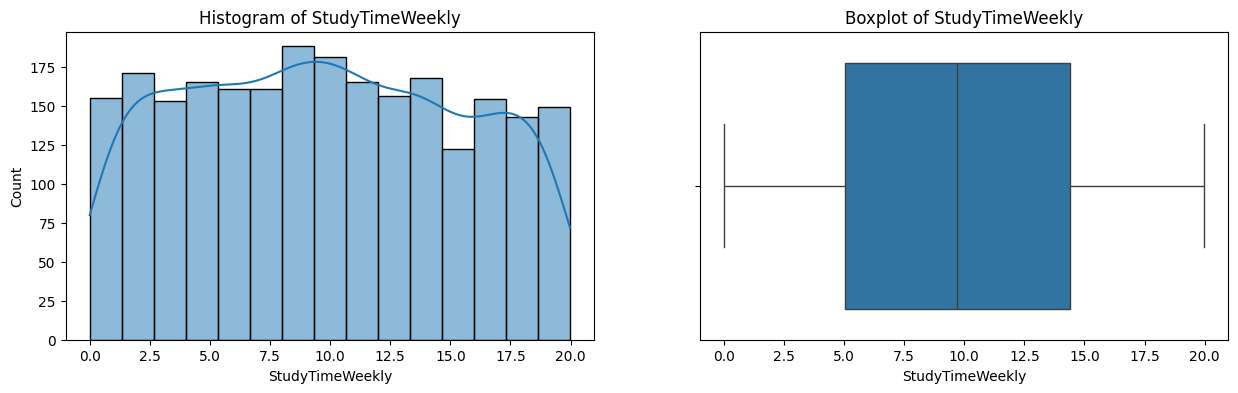

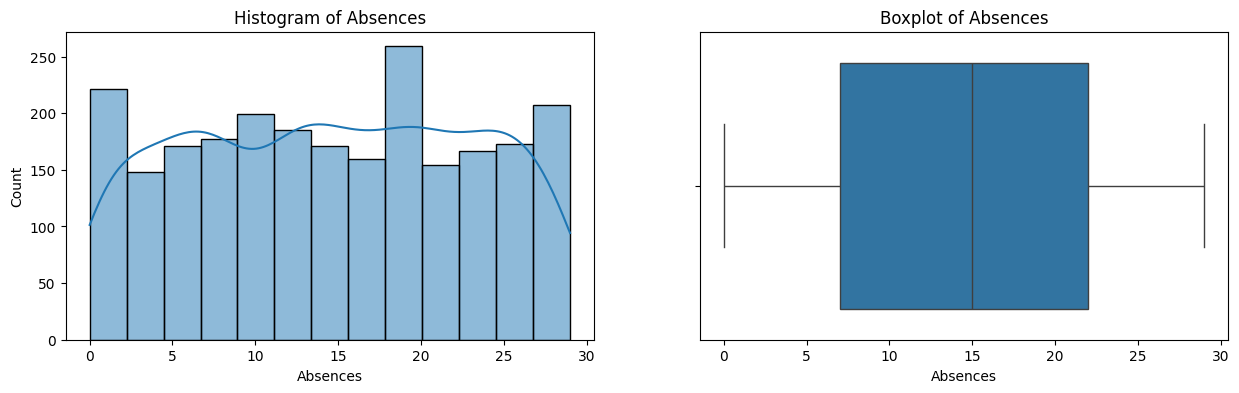

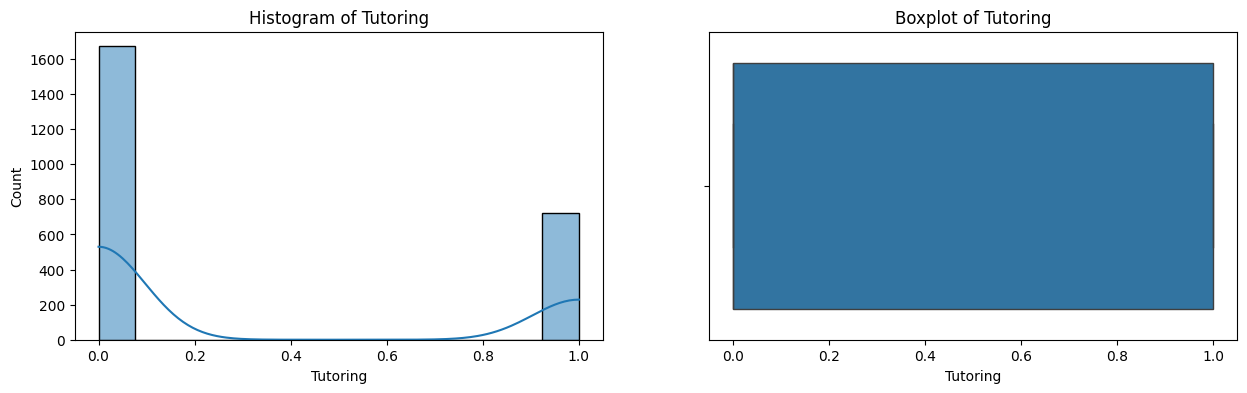

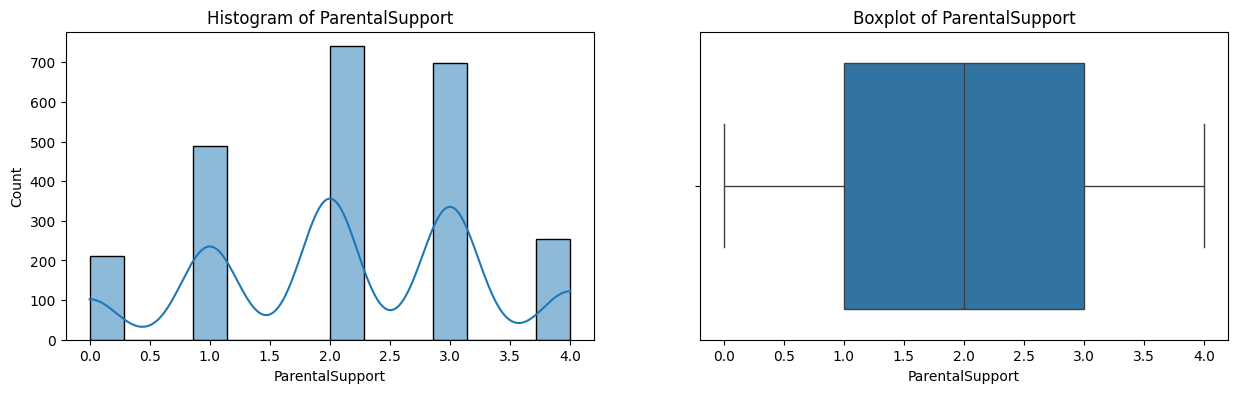

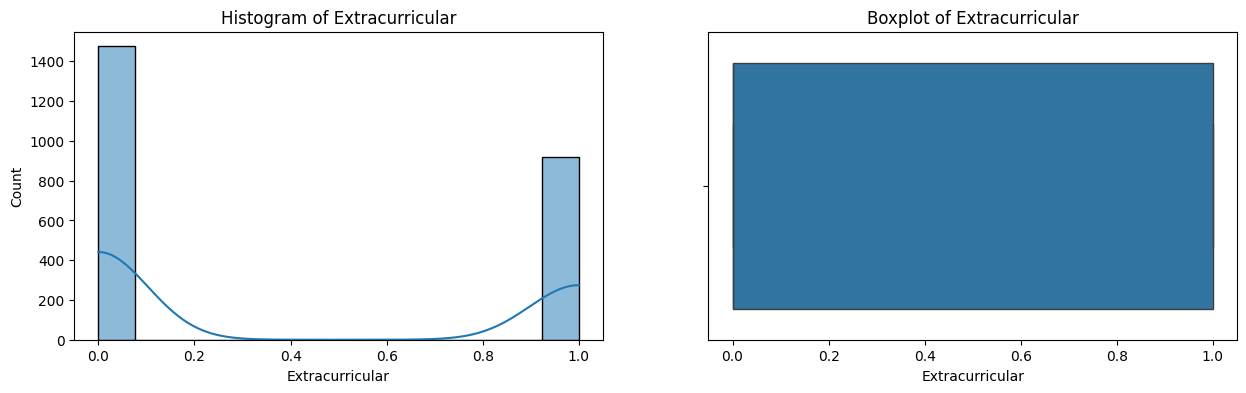

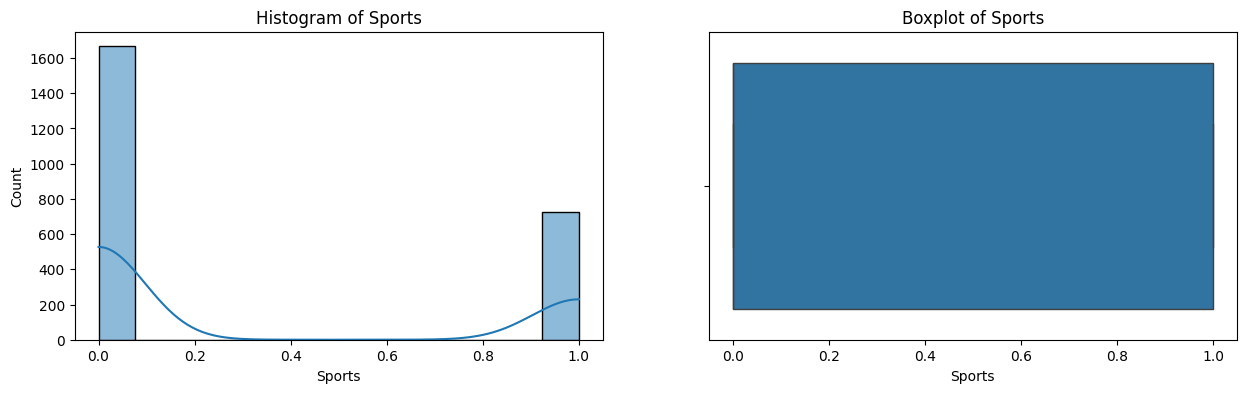

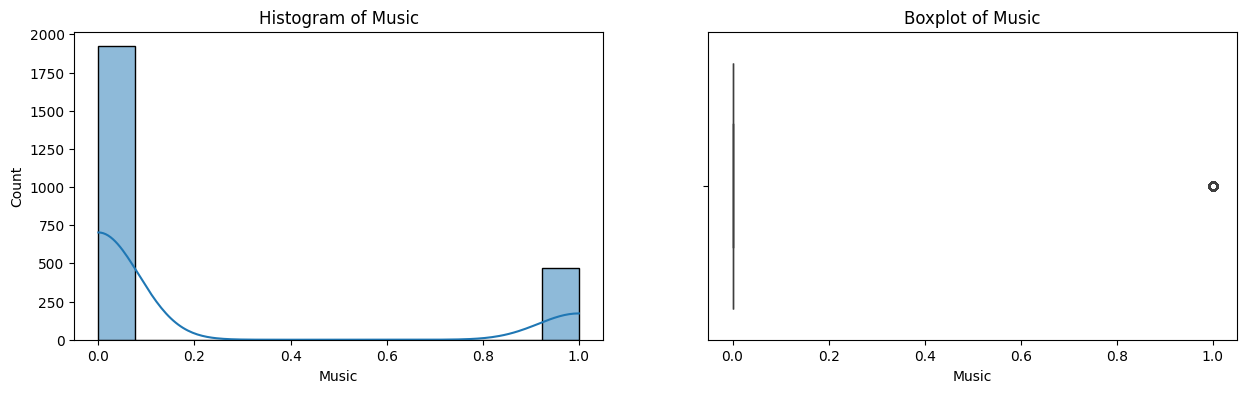

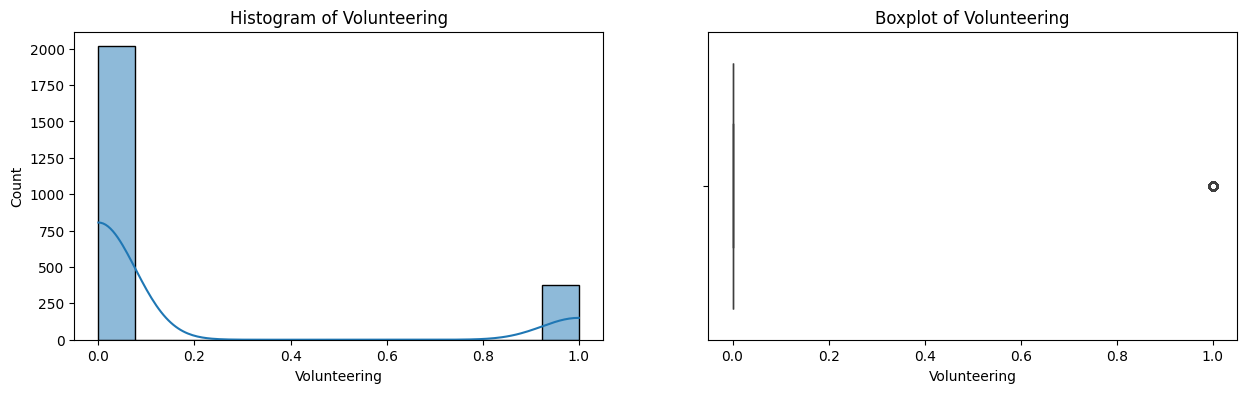

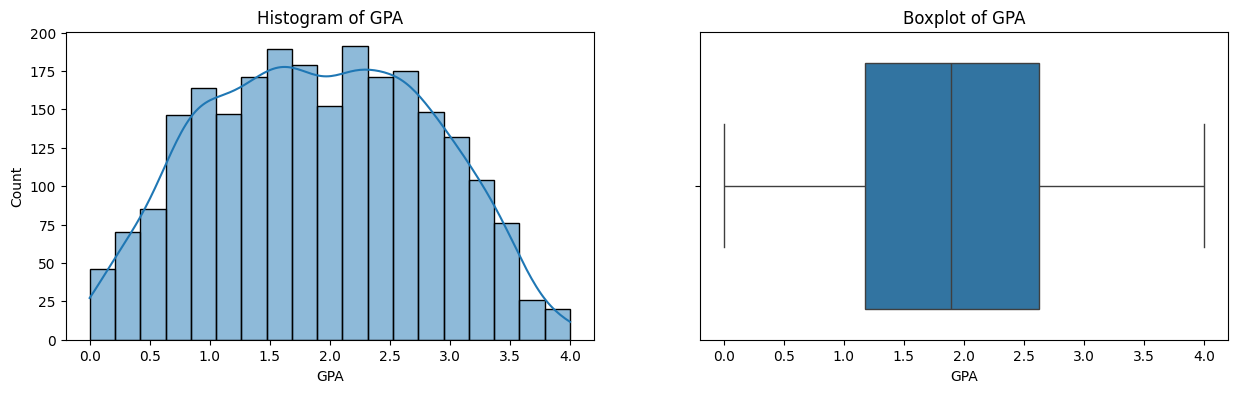

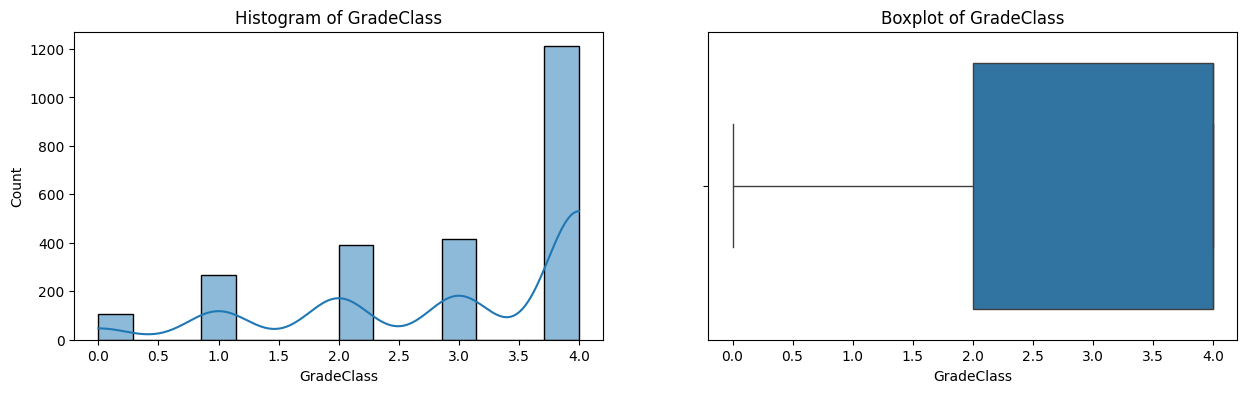

In [5]:
num_cols = dataset.select_dtypes(include=['int64','float64']).columns

for col in num_cols:
    plt.figure(figsize=(15,4))
    
    plt.subplot(1,2,1)
    sns.histplot(dataset[col], kde=True)
    plt.title(f"Histogram of {col}")
    
    plt.subplot(1,2,2)
    sns.boxplot(x=dataset[col])
    plt.title(f"Boxplot of {col}")
    
    plt.show()

## Correlation Matrix

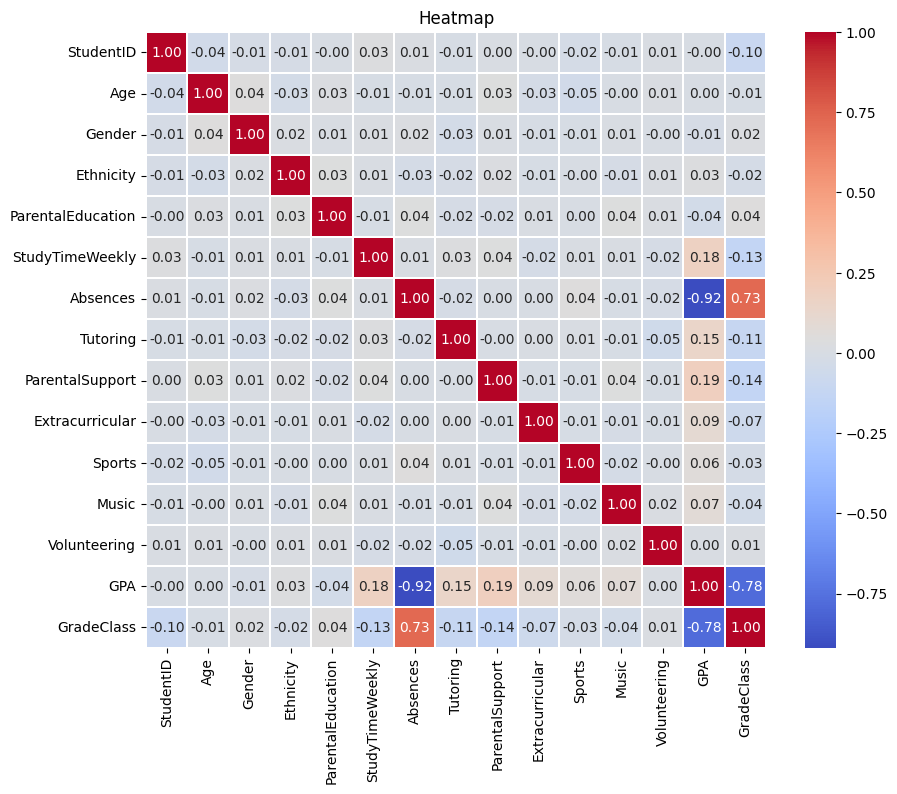

In [6]:
corr_mat = dataset.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.3)
plt.title('Heatmap')
plt.show()

## Cleaning The Dataset

In [7]:
dataset.drop('StudentID', axis=1, inplace=True)
dataset.drop('GPA', axis=1, inplace=True)

## Importing The Data

In [8]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [9]:
print(X)

[[17.  1.  0. ...  0.  1.  0.]
 [18.  0.  0. ...  0.  0.  0.]
 [15.  0.  2. ...  0.  0.  0.]
 ...
 [16.  1.  0. ...  0.  0.  1.]
 [16.  1.  1. ...  1.  1.  0.]
 [16.  1.  0. ...  0.  0.  1.]]


In [10]:
print(y)

[2. 1. 4. ... 2. 1. 1.]


In [11]:
print(X)

[[17.  1.  0. ...  0.  1.  0.]
 [18.  0.  0. ...  0.  0.  0.]
 [15.  0.  2. ...  0.  0.  0.]
 ...
 [16.  1.  0. ...  0.  0.  1.]
 [16.  1.  1. ...  1.  1.  0.]
 [16.  1.  0. ...  0.  0.  1.]]


## Encoding categorical data

### Encoding the Independent Variable

In [12]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
# X = np.array(ct.fit_transform(X))

In [13]:
print(X)

[[17.  1.  0. ...  0.  1.  0.]
 [18.  0.  0. ...  0.  0.  0.]
 [15.  0.  2. ...  0.  0.  0.]
 ...
 [16.  1.  0. ...  0.  0.  1.]
 [16.  1.  1. ...  1.  1.  0.]
 [16.  1.  0. ...  0.  0.  1.]]


### Encoding the Dependent Variable

In [14]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# y = le.fit_transform(y)

In [15]:
print(y)

[2. 1. 4. ... 2. 1. 1.]


## Splitting the dataset into the Training set and Test set

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [17]:
print(X_train)

[[18.  0.  0. ...  0.  1.  0.]
 [18.  1.  1. ...  0.  0.  0.]
 [17.  1.  1. ...  0.  0.  0.]
 ...
 [16.  1.  0. ...  0.  0.  0.]
 [18.  1.  1. ...  1.  0.  0.]
 [15.  1.  0. ...  0.  1.  0.]]


In [18]:
print(X_test)

[[18.  1.  1. ...  1.  0.  1.]
 [16.  0.  0. ...  0.  1.  0.]
 [17.  1.  0. ...  0.  1.  0.]
 ...
 [17.  1.  0. ...  0.  0.  0.]
 [18.  1.  2. ...  0.  0.  1.]
 [18.  0.  0. ...  0.  0.  0.]]


In [19]:
print(y_train)

[4. 2. 4. ... 1. 2. 1.]


In [20]:
print(y_test)

[2. 4. 4. 4. 3. 4. 4. 3. 1. 4. 2. 2. 2. 1. 3. 4. 0. 4. 4. 4. 2. 4. 4. 3.
 3. 4. 4. 4. 0. 4. 0. 4. 2. 3. 2. 4. 3. 2. 4. 4. 4. 4. 3. 4. 4. 3. 4. 4.
 1. 4. 2. 1. 4. 0. 4. 0. 4. 4. 4. 3. 3. 3. 2. 4. 4. 4. 4. 4. 2. 3. 4. 4.
 4. 2. 3. 3. 3. 4. 2. 2. 4. 2. 3. 1. 3. 4. 3. 0. 1. 0. 4. 2. 4. 2. 2. 2.
 4. 4. 4. 2. 1. 4. 3. 4. 1. 3. 4. 0. 4. 4. 3. 2. 2. 4. 1. 4. 2. 3. 4. 3.
 4. 2. 4. 4. 3. 4. 3. 4. 4. 3. 2. 2. 4. 4. 4. 1. 3. 2. 3. 3. 4. 4. 4. 1.
 1. 4. 4. 4. 4. 4. 2. 4. 3. 3. 4. 1. 4. 4. 3. 3. 3. 2. 3. 4. 4. 4. 2. 4.
 3. 4. 1. 3. 4. 4. 4. 4. 4. 2. 3. 3. 4. 2. 4. 4. 4. 3. 4. 2. 4. 4. 3. 3.
 3. 4. 2. 4. 4. 3. 1. 4. 2. 4. 0. 2. 3. 0. 0. 1. 3. 1. 1. 4. 2. 4. 2. 4.
 3. 4. 2. 2. 2. 3. 4. 3. 4. 4. 2. 1. 4. 1. 3. 1. 4. 3. 0. 1. 3. 4. 3. 2.
 2. 3. 4. 4. 0. 4. 4. 4. 4. 4. 4. 3. 2. 0. 4. 4. 4. 3. 4. 3. 4. 4. 4. 4.
 4. 1. 4. 4. 4. 4. 4. 4. 4. 4. 4. 2. 4. 4. 4. 3. 4. 4. 4. 3. 0. 4. 4. 4.
 3. 0. 4. 0. 1. 3. 4. 1. 4. 4. 4. 3. 2. 3. 4. 3. 4. 0. 1. 2. 4. 0. 4. 4.
 2. 4. 4. 2. 4. 4. 4. 4. 3. 4. 4. 4. 4. 4. 1. 2. 4.

## Feature Scaling

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
print(X_train)

[[ 1.36531097 -1.00681886 -0.84246929 ... -0.65636519  2.02517489
  -0.42870401]
 [ 1.36531097  0.99322733  0.13964147 ... -0.65636519 -0.49378451
  -0.42870401]
 [ 0.47298439  0.99322733  0.13964147 ... -0.65636519 -0.49378451
  -0.42870401]
 ...
 [-0.41934218  0.99322733 -0.84246929 ... -0.65636519 -0.49378451
  -0.42870401]
 [ 1.36531097  0.99322733  0.13964147 ...  1.52354211 -0.49378451
  -0.42870401]
 [-1.31166875  0.99322733 -0.84246929 ... -0.65636519  2.02517489
  -0.42870401]]


In [23]:
print(X_test)

[[ 1.36531097  0.99322733  0.13964147 ...  1.52354211 -0.49378451
   2.33261172]
 [-0.41934218 -1.00681886 -0.84246929 ... -0.65636519  2.02517489
  -0.42870401]
 [ 0.47298439  0.99322733 -0.84246929 ... -0.65636519  2.02517489
  -0.42870401]
 ...
 [ 0.47298439  0.99322733 -0.84246929 ... -0.65636519 -0.49378451
  -0.42870401]
 [ 1.36531097  0.99322733  1.12175223 ... -0.65636519 -0.49378451
   2.33261172]
 [ 1.36531097 -1.00681886 -0.84246929 ... -0.65636519 -0.49378451
  -0.42870401]]


## Build Neural Network

In [24]:
# 4.Build Neural Network
num_classes = 5
# Create Sequential model 
model = Sequential() 
# Input layer + hidden layer 
model.add(Dense(12, input_dim=12, activation='relu'))  # 8 features -> 12 neurons 
# Second hidden layer (optional) 
model.add(Dense(12, activation='relu')) 
# Output layer 
model.add(Dense(num_classes, activation='softmax'))  # Multiclass classification 
# Compile model 
model.compile(optimizer=Adam(learning_rate=0.01), 
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

D:\Books and Courses\42\4203\4204\Lab\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Train the Model

In [25]:
# 5. Train the Model 
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=250, 
                    batch_size=32, 
                    verbose=1)

Epoch 1/250
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5353 - loss: 1.1992 - val_accuracy: 0.6221 - val_loss: 0.9571
Epoch 2/250
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6717 - loss: 0.8987 - val_accuracy: 0.6660 - val_loss: 0.8541
Epoch 3/250
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7219 - loss: 0.8215 - val_accuracy: 0.6848 - val_loss: 0.8485
Epoch 4/250
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7407 - loss: 0.7761 - val_accuracy: 0.7223 - val_loss: 0.7534
Epoch 5/250
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7491 - loss: 0.7435 - val_accuracy: 0.6994 - val_loss: 0.7786
Epoch 6/250
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7507 - loss: 0.7317 - val_accuracy: 0.7182 - val_loss: 0.7493
Epoch 7/250
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7601 - loss: 0.7144 - val_accuracy: 0.7098 - val_loss: 0.7541
Epoch 8/250
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7522 - loss: 0.7072 - val_accuracy: 0.7349 - v

## Evaluate Model

In [26]:
#6. Evaluate Model 
loss, accuracy = model.evaluate(X_test, y_test) 
print(f"\nTest Accuracy: {accuracy*100:.2f}%") 


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7578 - loss: 1.2310  

Test Accuracy: 75.78%


## Plot Training History

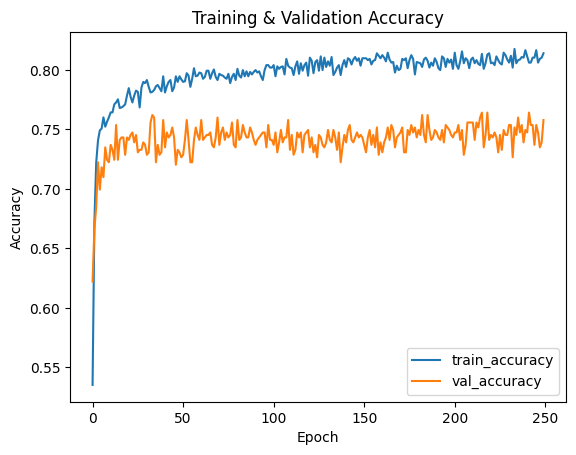

In [27]:
#7.. Plot Training History 
import matplotlib.pyplot as plt 
 
plt.plot(history.history['accuracy'], label='train_accuracy') 
plt.plot(history.history['val_accuracy'], label='val_accuracy') 
plt.xlabel('Epoch') 
plt.ylabel('Accuracy') 
plt.title('Training & Validation Accuracy') 
plt.legend() 
plt.show() 

## Loss Function

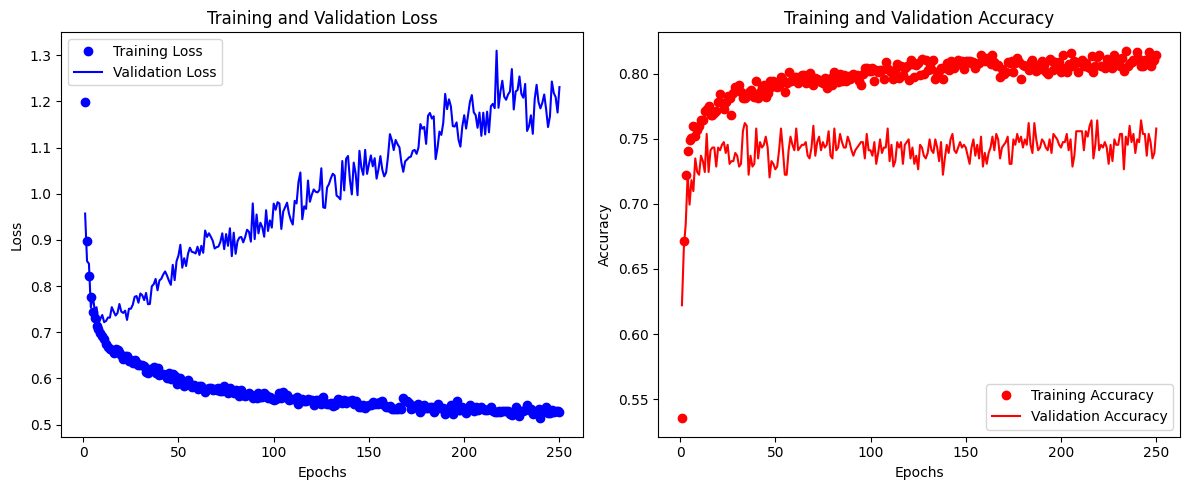

In [28]:
# b) Visualize the curves (Plotting Loss and Accuracy over Epochs)
def plot_history(history):
    # Get the data from the history object
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Plot Loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'bo', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, acc, 'ro', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history)

In [ ]:
model.summary()

In [33]:
# Display the Confusion Matrix
y_pred = model.predict(X_test)
print(y_pred[0])
print(y_test)

# conf_matrix = confusion_matrix(y_test, y_pred)

# plt.figure(figsize=(6, 5))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
#             xticklabels=['Predicted 0', 'Predicted 1'], 
#             yticklabels=['Actual 0', 'Actual 1'])
# plt.title('Confusion Matrix')
# plt.ylabel('True Label')
# plt.xlabel('Predicted Label')
# plt.show()

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
[0.00141572 0.08152499 0.81964463 0.09431789 0.00309679]
[2. 4. 4. 4. 3. 4. 4. 3. 1. 4. 2. 2. 2. 1. 3. 4. 0. 4. 4. 4. 2. 4. 4. 3.
 3. 4. 4. 4. 0. 4. 0. 4. 2. 3. 2. 4. 3. 2. 4. 4. 4. 4. 3. 4. 4. 3. 4. 4.
 1. 4. 2. 1. 4. 0. 4. 0. 4. 4. 4. 3. 3. 3. 2. 4. 4. 4. 4. 4. 2. 3. 4. 4.
 4. 2. 3. 3. 3. 4. 2. 2. 4. 2. 3. 1. 3. 4. 3. 0. 1. 0. 4. 2. 4. 2. 2. 2.
 4. 4. 4. 2. 1. 4. 3. 4. 1. 3. 4. 0. 4. 4. 3. 2. 2. 4. 1. 4. 2. 3. 4. 3.
 4. 2. 4. 4. 3. 4. 3. 4. 4. 3. 2. 2. 4. 4. 4. 1. 3. 2. 3. 3. 4. 4. 4. 1.
 1. 4. 4. 4. 4. 4. 2. 4. 3. 3. 4. 1. 4. 4. 3. 3. 3. 2. 3. 4. 4. 4. 2. 4.
 3. 4. 1. 3. 4. 4. 4. 4. 4. 2. 3. 3. 4. 2. 4. 4. 4. 3. 4. 2. 4. 4. 3. 3.
 3. 4. 2. 4. 4. 3. 1. 4. 2. 4. 0. 2. 3. 0. 0. 1. 3. 1. 1. 4. 2. 4. 2. 4.
 3. 4. 2. 2. 2. 3. 4. 3. 4. 4. 2. 1. 4. 1. 3. 1. 4. 3. 0. 1. 3. 4. 3. 2.
 2. 3. 4. 4. 0. 4. 4. 4. 4. 4. 4. 3. 2. 0. 4. 4. 4. 3. 4. 3. 4. 4. 4. 4.
 4. 1. 4. 4. 4. 4. 4. 4. 4. 4. 4. 2. 4. 4. 4. 3. 4. 4. 4. 3. 0. 4. 4. 4.
 3. 0. 4. 0. 1. 3. 4. 1. 4.